# Project Name : Bank Customer Churn Prediction Model

**Dataset**: Tập dữ liệu chứa thông tin cụ thể của 10.000 khách hàng với 14 thuộc tính khác nhau.

**Mục tiêu**: Thực hiện xây dựng các mô hình để dự báo liệu khách hàng có rời bỏ ngân hàng (Churn) hay không. Áp dụng học máy có giám sát **(Supervised Learning)** cho mô hình phân loại.

**Các mô hình áp dụng:**
- Logistic Regression
- Decision Tree
- Random Forest
- KNN
- SVM

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv('Churn_Modelling.csv')

# DATA UNDERSTANDING

In [3]:
# Xem 10 dòng đầu dữ liệu
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**Có 14 cột dữ liệu bao gồm**

- RowNumber: Số thứ tự hàng
- CustomerId: ID của khách hàng
- Surname: Họ của khách hàng
- CreditScore: Điểm Credit
- Geography: Nơi ở của khách hàng
- Gender: Giới tính
- Age: Tuổi
- Tenure: Thời hạn cho vay
- Balance: Số dư
- NumOfProducts: Số lượng sản phẩm
- HasCrCard: Có thẻ Credit hay không (0,1)
- IsActiveMember: Có phải là active member hay không (0,1)
- EstimatedSalary: Lương ước tính
- Exited: Có churn không (0,1)



In [4]:
# Xem hình dáng dữ liệu
df.shape

(10000, 14)

In [5]:
# Kiểm tra kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Nhận xét:**
- Bộ dữ liệu không có giá trị Null
- Kiểu dữ liệu của các biến đã hợp lý

**Thực hiện bỏ các cột không cần dùng đến trong dự báo, đổi tên cột "Exited" thành "Churn"**

In [6]:
df["churn"] = df["Exited"]
df.drop(["RowNumber","CustomerId","Surname","Exited"],axis = 1,inplace = True)

In [7]:
# Kiểm tra thông tin thống kê cơ bản dữ liệu
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Nhận xét:**
- Dữ liệu có độ chênh lệch đơn vị lớn giữa các biến, cần thực hiện chuẩn hóa

# Data Preprocessing

**Thực hiện mã hóa các cột dữ liệu Geography, Gender**

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

Các giá trị đã được mã hóa của cột 'Gender':
- Female: 0
- Male: 1

Các giá trị đã được mã hóa của cột 'Geography':
- France: 0
- Germany: 1
- Spain: 2

**Kiểm tra dữ liệu bị duplicate**

In [9]:
df.duplicated().any()

False

**Kiểm tra giá trị Unique trong từng biến**

In [10]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
churn                 2
dtype: int64

**Nhận xét:**
- Có 4 Numerical Features là: 'CreditScore', 'Age', 'Balance','EstimatedSalary'
- Các biến còn lại là Catogorical Features

**Kiểm tra Outliers của các Numerical Features**

Text(0.5, 1.0, 'EstimatedSalary')

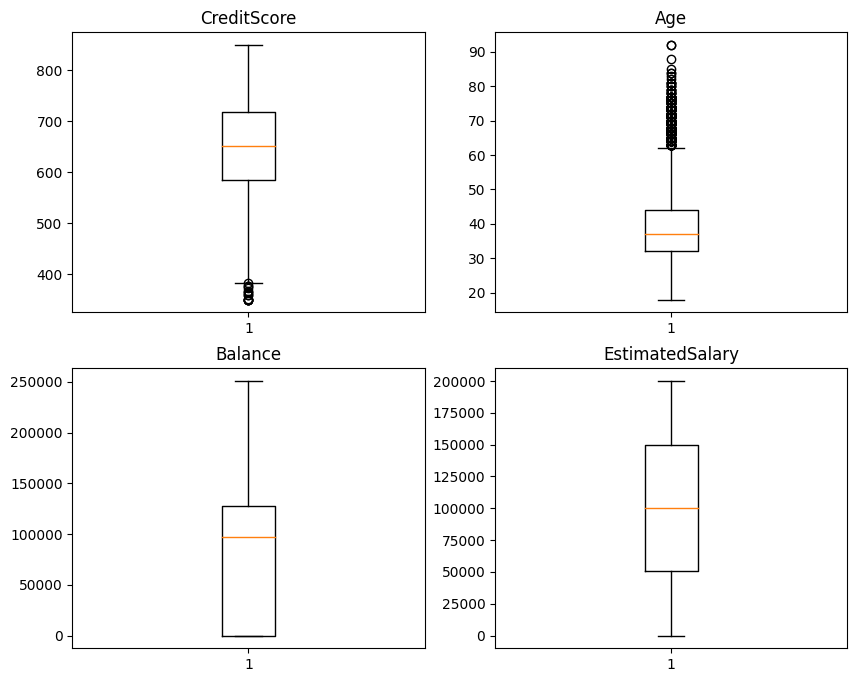

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo layout cho các biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Vẽ biểu đồ cho từng Feature
axes[0, 0].boxplot(df['CreditScore'])
axes[0, 1].boxplot(df['Age'])
axes[1, 0].boxplot(df['Balance'])
axes[1, 1].boxplot(df['EstimatedSalary'])

# Đặt tiêu đề cho từng biểu đồ
axes[0, 0].set_title('CreditScore')
axes[0, 1].set_title('Age')
axes[1, 0].set_title('Balance')
axes[1, 1].set_title('EstimatedSalary')

**Nhận xét:**
- Biến 'Age' và 'CreditScore' có các Outliers

In [12]:
# Xử lý các outliers bằng phương pháp Capping

age_lower_limit = 18
age_upper_limit = 60
df['Age'] = df['Age'].apply(lambda x: age_lower_limit if x < age_lower_limit else (age_upper_limit if x > age_upper_limit else x))

CreditScore_lower_limit = 400
CreditScore_upper_limit = 850
df['CreditScore'] = df['CreditScore'].apply(lambda x: CreditScore_lower_limit if x < CreditScore_lower_limit else (CreditScore_upper_limit if x > CreditScore_upper_limit else x))

Text(0.5, 1.0, 'EstimatedSalary')

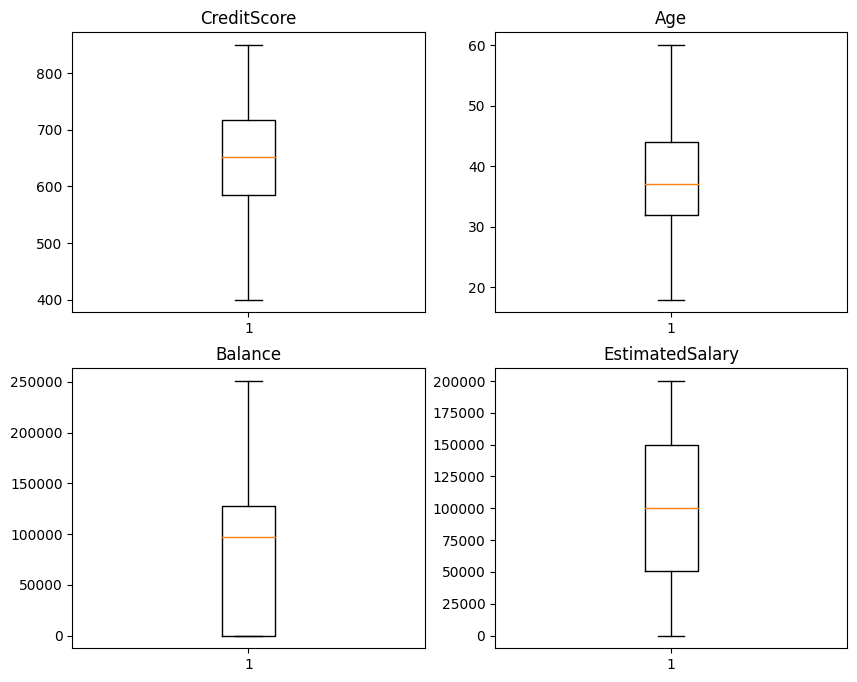

In [13]:
# Kiểm tra lại Boxplot

# Tạo layout cho các biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Vẽ biểu đồ cho từng Feature
axes[0, 0].boxplot(df['CreditScore'])
axes[0, 1].boxplot(df['Age'])
axes[1, 0].boxplot(df['Balance'])
axes[1, 1].boxplot(df['EstimatedSalary'])

# Đặt tiêu đề cho từng biểu đồ
axes[0, 0].set_title('CreditScore')
axes[0, 1].set_title('Age')
axes[1, 0].set_title('Balance')
axes[1, 1].set_title('EstimatedSalary')

**Kiểm tra phân phối của các Feature**

Text(0.5, 1.0, 'EstimatedSalary')

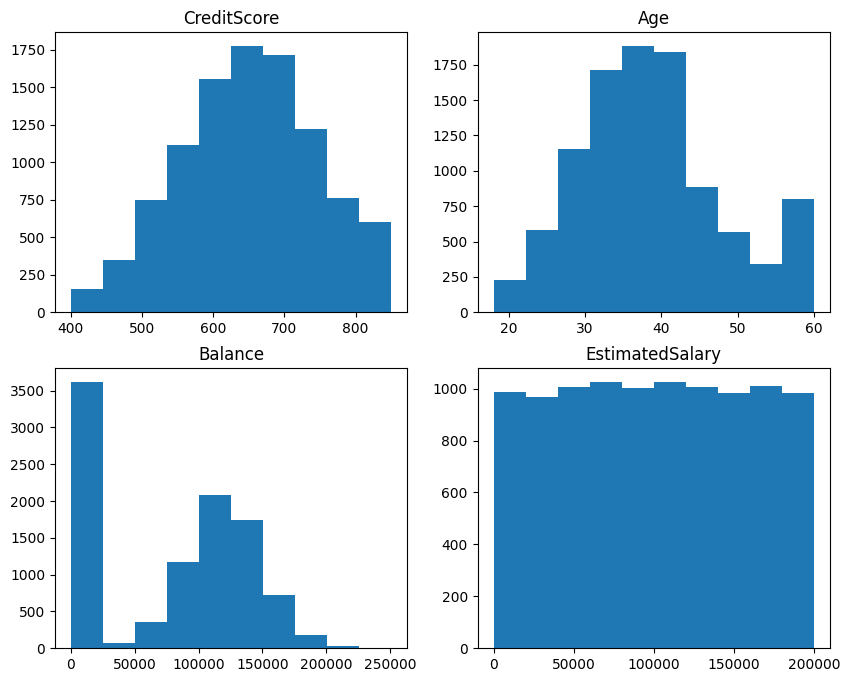

In [14]:
# Tạo layout cho các biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Vẽ biểu đồ cho từng Feature
axes[0, 0].hist(df['CreditScore'])
axes[0, 1].hist(df['Age'])
axes[1, 0].hist(df['Balance'])
axes[1, 1].hist(df['EstimatedSalary'])

# Đặt tiêu đề cho từng biểu đồ
axes[0, 0].set_title('CreditScore')
axes[0, 1].set_title('Age')
axes[1, 0].set_title('Balance')
axes[1, 1].set_title('EstimatedSalary')

**Kiểm tra độ tượng quan của các biến đối với biến mục tiêu**

<Axes: >

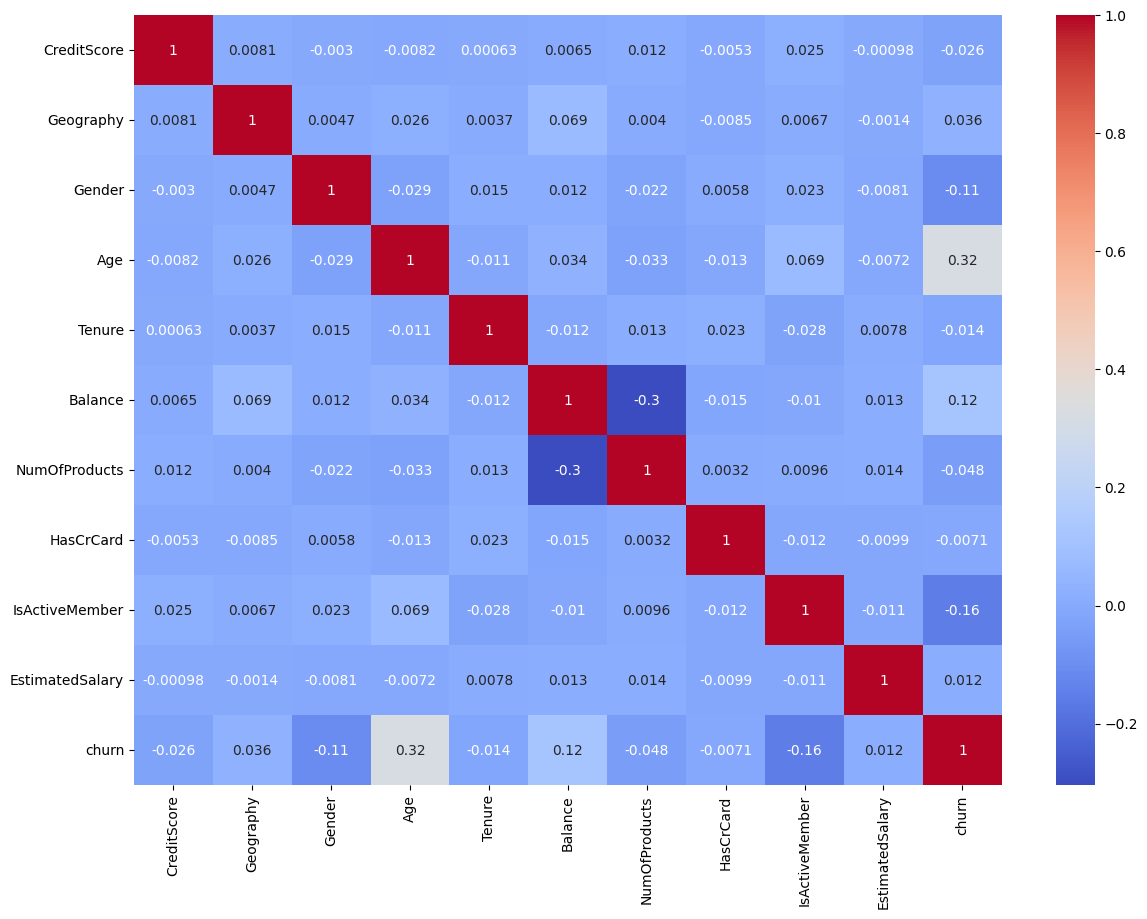

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

**Nhận xét:** Độ tương quan của các biến đối với biến mục tiêu nhìn chung khá thấp

**Thực hiện chuẩn hóa dữ liệu**

In [16]:
#  Chia biến độc lập và biến phụ thuộc 
X= df.drop('churn',axis=1)
y=df['churn']

In [17]:
# Kiểm tra lại 
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


**Nhận xét:** Giữa các biến có độ chênh lệch đơn vị lớn, do đó cần thực hiện chuẩn hóa, sử dụng phương pháp Min-Max Scaling (chuyển đổi giá trị của biến thành khoảng [0, 1])

In [23]:
# Chuẩn hóa các biến độc lập
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
X[0:5]

array([[0.48666667, 0.        , 0.        , 0.57142857, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489],
       [0.46222222, 1.        , 0.        , 0.54761905, 0.1       ,
        0.33403148, 0.        , 0.        , 1.        , 0.56270874],
       [0.22666667, 0.        , 0.        , 0.57142857, 0.8       ,
        0.63635718, 0.66666667, 1.        , 0.        , 0.56965435],
       [0.66444444, 0.        , 0.        , 0.5       , 0.1       ,
        0.        , 0.33333333, 0.        , 0.        , 0.46912005],
       [1.        , 1.        , 0.        , 0.5952381 , 0.2       ,
        0.50024622, 0.        , 1.        , 1.        , 0.39540036]])

**Thực hiện xử lý mất cân bằng**

churn
0    7963
1    2037
Name: count, dtype: int64

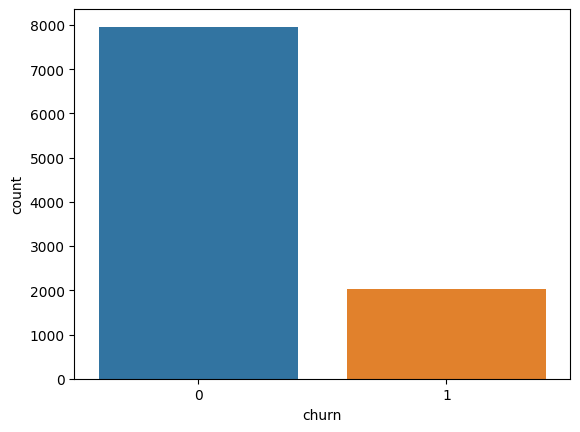

In [24]:
# Biến mục tiêu trước khi xử lý mất cân bằng

sns.countplot(data=df, x="churn");
df["churn"].value_counts()

**Nhận xét:** Có sự mất cân bằng trong biến mục tiêu cần được xử lý. Vì bộ dữ liệu ít, sử dụng phương pháp oversampling để xử lý mất cân bằng, cụ thể là kỹ thuật SMOTE

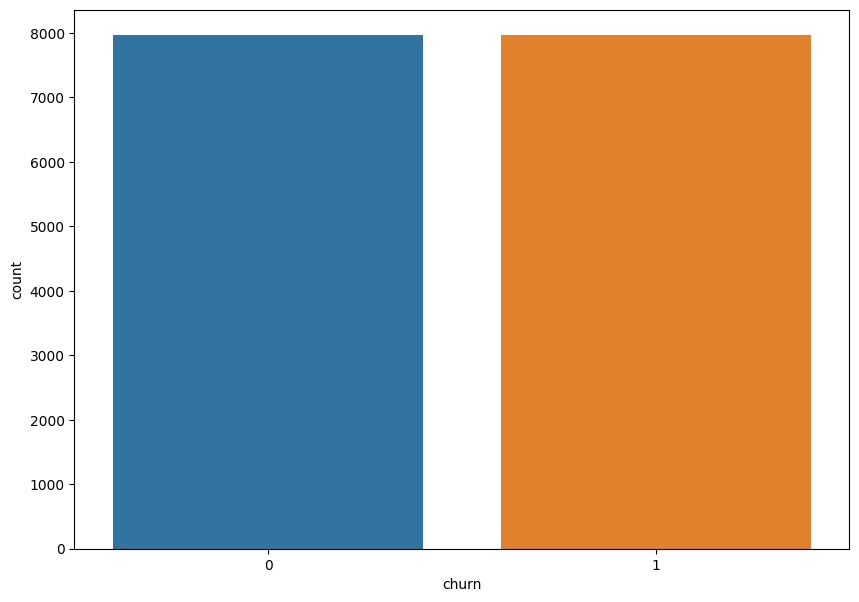

In [25]:
#Biến mục tiêu sau khi xử lý mất cân bằng
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)

plt.figure(figsize=(10, 7))
sns.countplot(data = df, x = y_over)
plt.show()

# Xây dựng các Model dự báo 

In [26]:
# Import các thư viện cần thiết
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Chia tập Train, Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_over, y_over, test_size=0.2, random_state=4)
print ('Train set input:', X_train.shape, 'output:', y_train.shape[0])
print ('Test set input:', X_test.shape, 'output:', y_test.shape[0])

Train set input: (12740, 10) output: 12740
Test set input: (3186, 10) output: 3186


**Model-1: LogisticRegression**

In [28]:
# Xây dựng model LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred1=log.predict(X_test)

In [29]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred1)
classification_rep = classification_report(y_test, y_pred1)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7250470809792844
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1617
           1       0.72      0.72      0.72      1569

    accuracy                           0.73      3186
   macro avg       0.72      0.73      0.72      3186
weighted avg       0.73      0.73      0.73      3186



**Model-2: Decision Tree**

In [32]:
# Xây dựng model Decision Tree
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred2=dtc.predict(X_test)

In [33]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8433772755806654
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1617
           1       0.83      0.86      0.84      1569

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



**Model-3: Random Forest**

In [34]:
# Xây dựng model Random Forest
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred3=rfc.predict(X_test)

In [35]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9023854362837413
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1617
           1       0.90      0.90      0.90      1569

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



**Model-4: KNN**

In [36]:
# Xây dựng model KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred4=knn.predict(X_test)

In [37]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred4)
classification_rep = classification_report(y_test, y_pred4)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8421217827997489
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1617
           1       0.79      0.93      0.85      1569

    accuracy                           0.84      3186
   macro avg       0.85      0.84      0.84      3186
weighted avg       0.85      0.84      0.84      3186



**Model-5: SVM**

In [38]:
# Xây dựng model SVM
svm=svm.SVC()
svm.fit(X_train,y_train)
y_pred5=svm.predict(X_test)

In [39]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred5)
classification_rep = classification_report(y_test, y_pred5)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.802887633396108
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1617
           1       0.81      0.78      0.80      1569

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



**Sử dụng ROC, AUC để so sánh các mô hình**

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


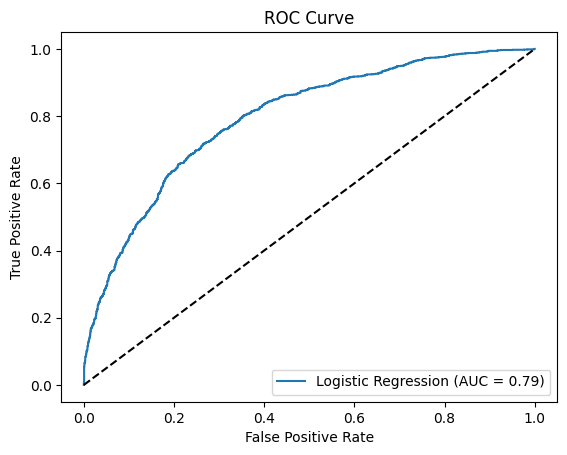

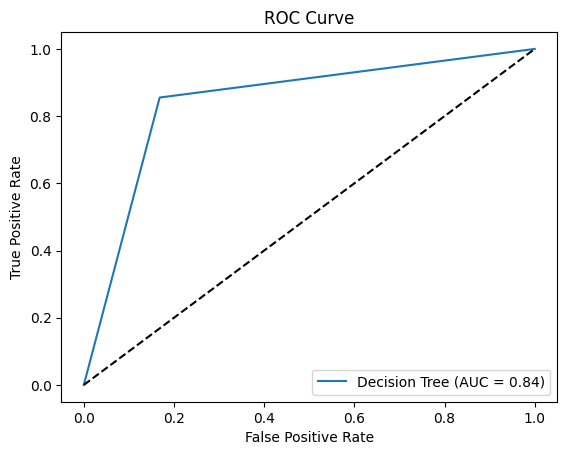

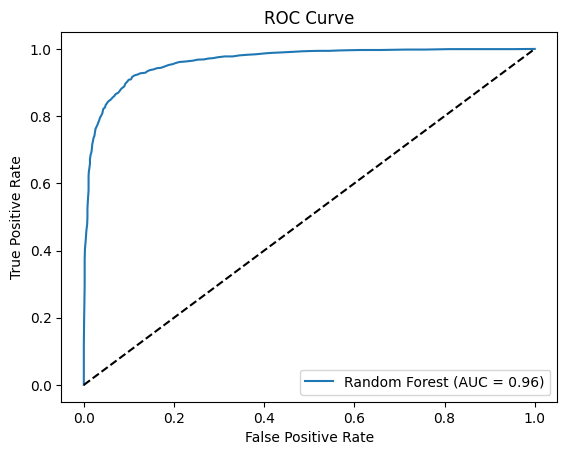

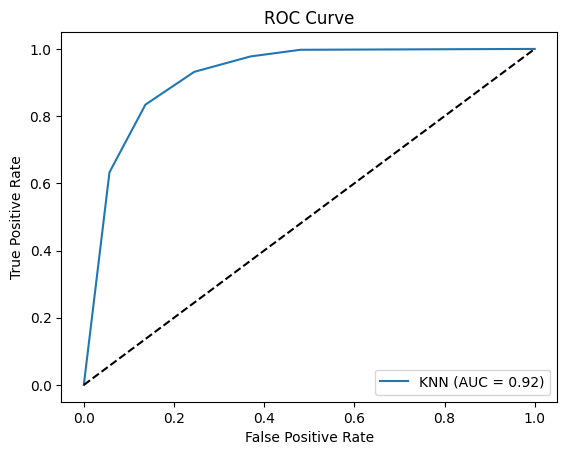

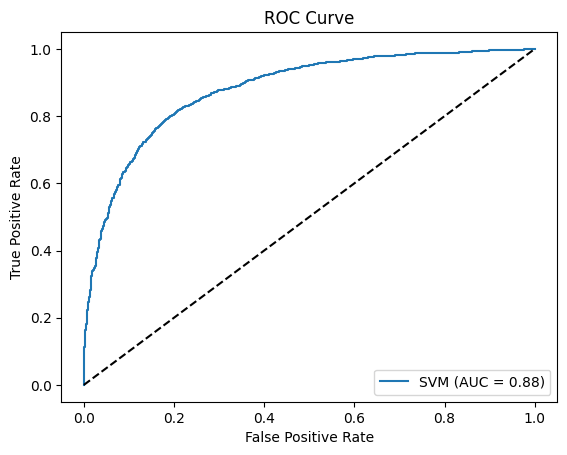

In [43]:
plot_roc_curve(y_test, log.predict_proba(X_test)[:, 1], 'Logistic Regression')
plot_roc_curve(y_test, dtc.predict_proba(X_test)[:, 1], 'Decision Tree')
plot_roc_curve(y_test, rfc.predict_proba(X_test)[:, 1], 'Random Forest')
plot_roc_curve(y_test, knn.predict_proba(X_test)[:, 1], 'KNN')
plot_roc_curve(y_test, svm.decision_function(X_test), 'SVM')

**Kết luận: Với bài toàn Bank Churn Predict như trên, mô hình Random Forest cho ra kết quả dự báo tốt nhất**